In [2]:
import sys
sys.path.append("./src")
from GA import *

In [3]:
map = Map()

In [9]:
ga = GA(64, map, [Order() for _ in range(10)])
ga.init_population()
pop= ga.ga_process_iterator()

Epoch 0	65.82155506935065	6.04
Epoch 1	63.04654622508224	5.06
Epoch 2	63.04654622508224	2.7
Epoch 3	58.0107163339936	2.99
Epoch 4	56.877305980944705	3.23
Epoch 5	56.877305980944705	2.95
Epoch 6	56.877305980944705	2.58
Epoch 7	56.177778089490566	0.04
Epoch 8	56.177778089490566	3.06
Epoch 9	56.177778089490566	1.09
Epoch 10	56.177778089490566	0.85
Epoch 11	56.177778089490566	2.04
Epoch 12	56.177778089490566	0.05
Epoch 13	56.177778089490566	1.27
Epoch 14	56.177778089490566	0.03
Epoch 15	56.177778089490566	0.6
Epoch 16	56.04697587571759	0.03
Epoch 17	55.934862557403605	1.61
Epoch 18	55.89277593439055	0.04
Epoch 19	55.89277593439055	0.03
Epoch 20	55.89277593439055	0.03
Epoch 21	55.89277593439055	0.03
Epoch 22	55.89277593439055	0.69
Epoch 23	53.4027447501641	0.04
Epoch 24	53.4027447501641	2.56
Epoch 25	53.299657280822636	0.15
Epoch 26	53.299657280822636	1.43
Epoch 27	53.299657280822636	0.04
Epoch 28	53.299657280822636	0.03
Epoch 29	53.299657280822636	1.03
Epoch 30	49.19472173038969	0.83
Epoch

In [11]:
print("Best Pop", pop.route, pop.breakp)
best_deopt = ga.get_best_depot(pop.route, pop.breakp)
ranges = ga.get_range(pop.route, pop.breakp)
print("Best Cost", ga.get_one_cost(pop))
print()
print("Best Path")
for index,rang in enumerate(ranges):
    print(best_deopt[index], end='->')
    for i in rang:
        print(i, end='->')
    print(best_deopt[index], end=" ")
    print()

Best Pop [13 17  4  6 14 16  7 15  1  9 10  2  5  3 19  8 11 12  0 18] [3, 8, 10, 14, 17, 18]
Best Cost 46.24803681735065

Best Path
1->13->17->4->1 
2->6->14->16->7->15->2 
3->1->9->3 
3->10->2->5->3->3 
3->19->8->11->3 
4->12->4 
3->0->18->3 


Text(0, 0.5, 'Cost')

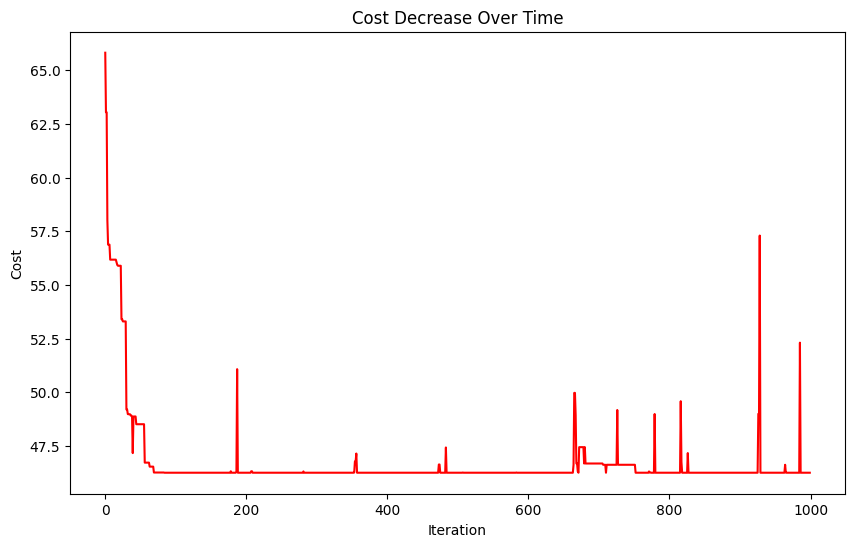

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ga.cost_list, linestyle="-", color="r", label="Cost")

# 添加标题和标签
plt.title("Cost Decrease Over Time")
plt.xlabel("Iteration")
plt.ylabel("Cost")

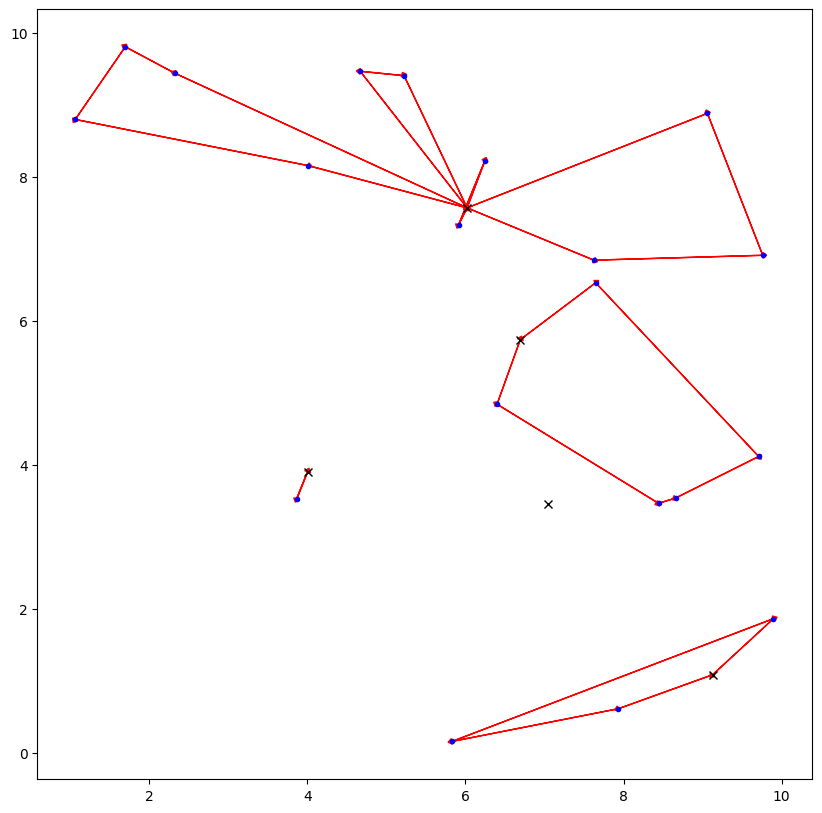

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(map._depot_coordinates[:, 0], map._depot_coordinates[:, 1], 'kx')
plt.plot(map._target_coordinates[:, 0], map._target_coordinates[:, 1], 'b.')

for i,rang in enumerate(ranges):
    startpoint = map._depot_coordinates[best_deopt[i]]
    endpoint = map._target_coordinates[rang[0]]
    plt.arrow(
        startpoint[0],
        startpoint[1],
        endpoint[0] - startpoint[0],
        endpoint[1] - startpoint[1],
        head_width=0.08,
        head_length=0.05,
        fc="r",
        ec="r",
    )
    for j in range(1, len(rang)):
        startpoint = map._target_coordinates[rang[j-1]]
        endpoint = map._target_coordinates[rang[j]]
        plt.arrow(
            startpoint[0],
            startpoint[1],
            endpoint[0] - startpoint[0],
            endpoint[1] - startpoint[1],
            head_width=0.08,
            head_length=0.05,
            fc="r",
            ec="r",
        )
    
    startpoint = map._target_coordinates[rang[-1]]
    endpoint = map._depot_coordinates[best_deopt[i]]
    plt.arrow(
        startpoint[0],
        startpoint[1],
        endpoint[0] - startpoint[0],
        endpoint[1] - startpoint[1],
        head_width=0.08,
        head_length=0.05,
        fc="r",
        ec="r",
    )